<a href="https://colab.research.google.com/gist/borao/69df368fc7d5348506c8c0e535c67e1d/data_loading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import itertools
import requests
import pandas as pd
import networkx as nx

In [2]:
def get_coauthors_as_edge_list(author_id):
  # Get the original author's profile
  print(author_id)
  query = requests.get(f"https://api.semanticscholar.org/v1/author/{author_id}").json()
  print(query)
  original_author = {'authorId': query['authorId'], 'name': query['name'], 'url': query['url']}
  # Make a DataFrame of the original author's papers
  papers = pd.DataFrame(query['papers'])
  # Query for the actual papers
  specific_papers = list(map(lambda url: requests.get(f"https://api.semanticscholar.org/v1/paper/URL:{url}"), papers['url']))
  # Convert to a list of JSONs
  specific_paper_jsons = list(map(lambda x: x.json(), specific_papers))
  # Get coauthors
  coauthors = [specific_paper_json['authors'] for specific_paper_json in specific_paper_jsons]
  coauthors = list(itertools.chain.from_iterable(coauthors))
  edge_list = [(original_author['name'], coauthor['name']) for coauthor in coauthors]
  edge_list_with_ids = [(original_author['authorId'], coauthor['authorId']) for coauthor in coauthors]
  return edge_list, edge_list_with_ids

In [3]:
edge_list, edge_list_with_ids = get_coauthors_as_edge_list("1734808354")

1734808354
{'aliases': [], 'authorId': '1734808354', 'influentialCitationCount': 1, 'name': 'Bora Oztekin', 'papers': [{'arxivId': '2006.01054', 'paperId': 'ed51c9a819aa25ba5a940003fdc016e1c112f6cc', 'title': 'Effects of population co-location reduction on cross-county transmission risk of COVID-19 in the United States', 'url': 'https://www.semanticscholar.org/paper/ed51c9a819aa25ba5a940003fdc016e1c112f6cc', 'year': 2021}, {'arxivId': '2101.03458', 'paperId': '32039d4019a19b60120d6eebcd066cdf6bc0d7e9', 'title': 'Unraveling the Dynamic Importance of County-level Features in Trajectory of COVID-19', 'url': 'https://www.semanticscholar.org/paper/32039d4019a19b60120d6eebcd066cdf6bc0d7e9', 'year': 2021}, {'arxivId': '2102.05013', 'paperId': '8d2bff72ac5ae1ce722dbd7ebd39fdd93d271323', 'title': 'Spherical Message Passing for 3D Graph Networks', 'url': 'https://www.semanticscholar.org/paper/8d2bff72ac5ae1ce722dbd7ebd39fdd93d271323', 'year': 2021}, {'paperId': 'd7e7395f1f8495538ffeb6dc441b0e289

In [ ]:
second_degree = [get_coauthors_as_edge_list(edge[1]) for edge in edge_list_with_ids]

144003795
{'aliases': [], 'authorId': '144003795', 'influentialCitationCount': 8, 'name': 'Chao Fan', 'papers': [{'paperId': '36a1378b04871b84ae75caf4ea65dc660708c9a1', 'title': 'A comparison of spatial autocorrelation indices and landscape metrics in measuring urban landscape fragmentation', 'url': 'https://www.semanticscholar.org/paper/36a1378b04871b84ae75caf4ea65dc660708c9a1', 'year': 2014}, {'paperId': '1299e79ac45afeb02322da20c7d2b05b8084f7b3', 'title': "Aerosol size distribution and new particle formation events in the suburb of Xi'an, northwest China", 'url': 'https://www.semanticscholar.org/paper/1299e79ac45afeb02322da20c7d2b05b8084f7b3', 'year': 2017}, {'arxivId': '2006.01054', 'paperId': 'ed51c9a819aa25ba5a940003fdc016e1c112f6cc', 'title': 'Effects of population co-location reduction on cross-county transmission risk of COVID-19 in the United States', 'url': 'https://www.semanticscholar.org/paper/ed51c9a819aa25ba5a940003fdc016e1c112f6cc', 'year': 2021}, {'paperId': '1c735897a

KeyError: ignored

In [ ]:
second_degree

['144003795', '3097669', '97492074', '1734808354', '104952974']

In [ ]:
list(itertools.chain.from_iterable(second_degree))

In [ ]:
edge_list_with_ids[0][1]

'144003795'

In [ ]:
G = nx.Graph(edge_list)

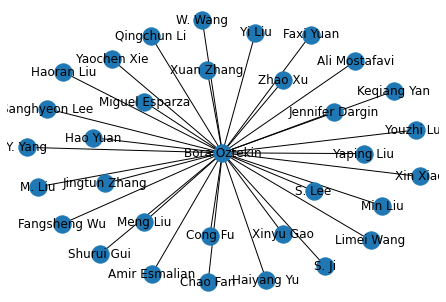

In [ ]:
nx.draw(G, with_labels=True)

In [ ]:
query = requests.get("https://api.semanticscholar.org/v1/author/144003795").json()
query

{'aliases': [],
 'authorId': '144003795',
 'influentialCitationCount': 8,
 'name': 'Chao Fan',
 'papers': [{'paperId': '36a1378b04871b84ae75caf4ea65dc660708c9a1',
   'title': 'A comparison of spatial autocorrelation indices and landscape metrics in measuring urban landscape fragmentation',
   'url': 'https://www.semanticscholar.org/paper/36a1378b04871b84ae75caf4ea65dc660708c9a1',
   'year': 2014},
  {'paperId': '1299e79ac45afeb02322da20c7d2b05b8084f7b3',
   'title': "Aerosol size distribution and new particle formation events in the suburb of Xi'an, northwest China",
   'url': 'https://www.semanticscholar.org/paper/1299e79ac45afeb02322da20c7d2b05b8084f7b3',
   'year': 2017},
  {'arxivId': '2006.01054',
   'paperId': 'ed51c9a819aa25ba5a940003fdc016e1c112f6cc',
   'title': 'Effects of population co-location reduction on cross-county transmission risk of COVID-19 in the United States',
   'url': 'https://www.semanticscholar.org/paper/ed51c9a819aa25ba5a940003fdc016e1c112f6cc',
   'year': 2